In [112]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
deli=pd.read_csv('/content/deliverytime.txt')

In [71]:
deli.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [72]:
deli.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
45592,5FB2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,Snack,scooter,36


In [73]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [74]:
deli.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


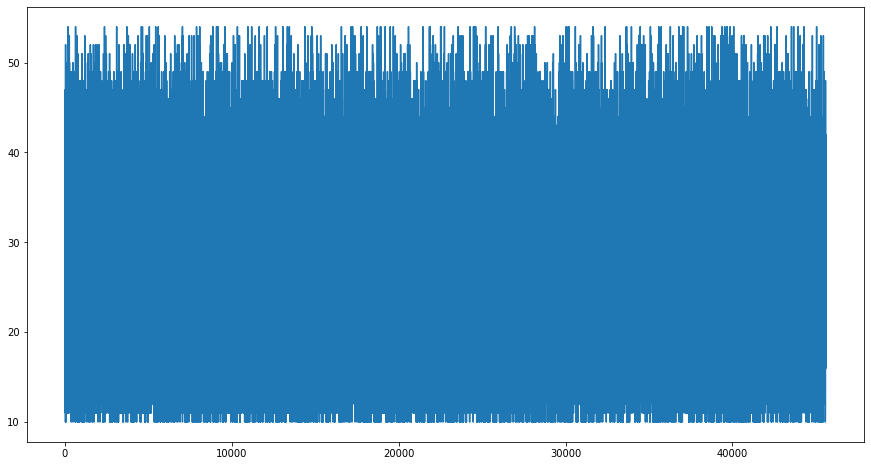

In [75]:
plt.figure(figsize=(15,8))
plt.plot(deli["Time_taken(min)"])
plt.show()

In [76]:
deli["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [77]:
deli.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [78]:
cols=['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)']

In [79]:
for i in cols:
  print("columns name",i,len(deli[i].unique()))

columns name ID 45451
columns name Delivery_person_ID 1320
columns name Delivery_person_Age 22
columns name Delivery_person_Ratings 28
columns name Restaurant_latitude 657
columns name Restaurant_longitude 518
columns name Delivery_location_latitude 4373
columns name Delivery_location_longitude 4373
columns name Type_of_order 4
columns name Type_of_vehicle 4
columns name Time_taken(min) 45


In [80]:
deli.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [81]:
deli["Time_taken"]=deli["Time_taken(min)"]

In [82]:
dropcol=["ID","Delivery_person_ID","Time_taken(min)"]

In [83]:
deli.drop(dropcol,axis=1,inplace=True)

In [84]:
deli.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


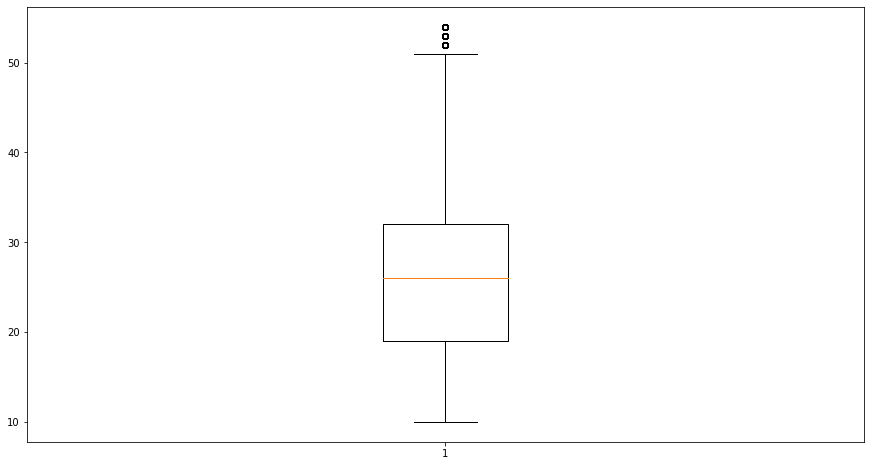

In [85]:
plt.figure(figsize=(15,8))
plt.boxplot(x=deli["Time_taken"])
plt.show()

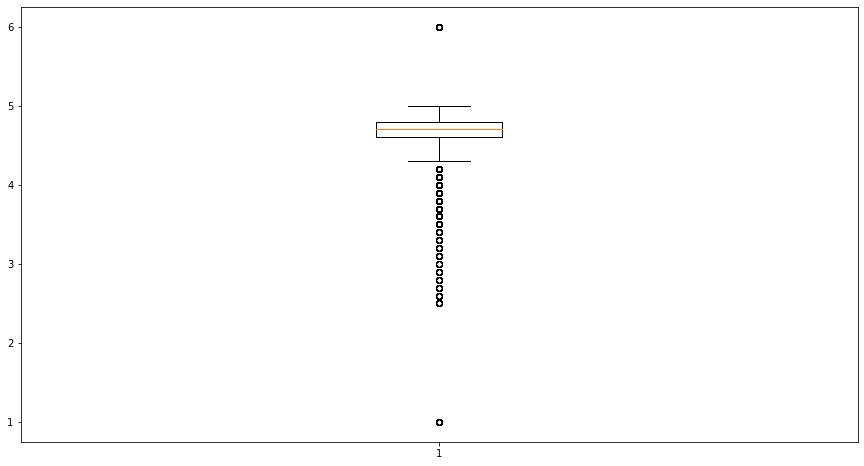

In [86]:
plt.figure(figsize=(15,8))
plt.boxplot(x=deli["Delivery_person_Ratings"])
plt.show()

In [87]:
for i in deli["Delivery_person_Ratings"]:
  if i>5:
    print(i)
  elif i<2:
    print(i)

1.0
1.0
1.0
6.0
6.0
6.0
6.0
6.0
1.0
6.0
6.0
6.0
1.0
6.0
6.0
6.0
6.0
1.0
1.0
1.0
6.0
6.0
6.0
6.0
6.0
6.0
1.0
1.0
1.0
1.0
6.0
6.0
6.0
6.0
6.0
6.0
1.0
6.0
1.0
6.0
1.0
6.0
1.0
1.0
1.0
6.0
6.0
6.0
1.0
6.0
1.0
1.0
1.0
6.0
6.0
1.0
1.0
6.0
6.0
6.0
1.0
6.0
6.0
1.0
6.0
1.0
6.0
1.0
6.0
6.0
1.0
1.0
1.0
1.0
6.0
6.0
6.0
6.0
1.0
1.0
6.0
6.0
1.0
6.0
1.0
6.0
6.0
6.0
1.0
1.0
6.0


In [88]:
deli.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [89]:
x=deli['Delivery_person_Age']
y=deli['Time_taken']

In [90]:
#plt.bar(x,y)

In [91]:
cols

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Type_of_order',
 'Type_of_vehicle',
 'Time_taken(min)']

In [92]:
cat_cols=['Type_of_order',
 'Type_of_vehicle']

In [93]:
# convert to  category 
deli["Type_of_order"]=deli["Type_of_order"].astype('category')
deli["Type_of_vehicle"]=deli["Type_of_vehicle"].astype("category")

In [94]:
# assigning the number of category
deli["type_of_order1"]=deli["Type_of_order"].cat.codes
deli["type_of_vehicle"]=deli["Type_of_vehicle"].cat.codes

In [95]:
ohe=OneHotEncoder()

In [96]:
ohe_data=pd.DataFrame(ohe.fit_transform(deli[["type_of_order1","type_of_vehicle"]]).toarray())

In [97]:
deli_data=deli.join(ohe_data)

In [98]:
deli_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken,type_of_order1,type_of_vehicle,0,1,2,3,4,5,6,7
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
drop_cols=["Type_of_order","Type_of_vehicle","type_of_order1","type_of_vehicle"]

In [100]:
deli_data.drop(drop_cols,axis=1,inplace=True)

In [101]:
deli_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken,0,1,2,3,4,5,6,7
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [103]:
scaler=StandardScaler()

In [107]:
deli_data.loc[:,["Delivery_person_Age"]]=scaler.fit_transform(deli_data.loc[:,["Delivery_person_Age"]])

In [108]:
deli_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken,0,1,2,3,4,5,6,7
0,1.308808,4.9,22.745049,75.892471,22.765049,75.912471,24,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.782190,4.5,12.913041,77.683237,13.043041,77.813237,33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.148742,4.4,12.914264,77.678400,12.924264,77.688400,26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.484347,4.7,11.003669,76.976494,11.053669,77.026494,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.431111,4.6,12.972793,80.249982,13.012793,80.289982,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [109]:
deli_data.columns

Index([        'Delivery_person_Age',     'Delivery_person_Ratings',
               'Restaurant_latitude',        'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude',
                        'Time_taken',                             0,
                                   1,                             2,
                                   3,                             4,
                                   5,                             6,
                                   7],
      dtype='object')

In [124]:
features=['Delivery_person_Age',     'Delivery_person_Ratings',
               'Restaurant_latitude',        'Restaurant_longitude',
        'Delivery_location_latitude', 'Delivery_location_longitude',
                                                     0,
                                   1,                             2,
                                   3,                             4,
                                   5,                             6,
                                   7]

In [ ]:
features

In [170]:
target=["Time_taken"]


In [126]:
xtrain,xtest,ytrain,ytest=train_test_split(deli_data[features],deli_data[target],test_size=0.2,random_state=16)

In [139]:
xtrain.columns=xtrain.columns.astype(str)
xtest.columns=xtest.columns.astype(str)
ytrain.columns=ytrain.columns.astype(str)
ytest.columns=ytest.columns.astype(str)


In [138]:
xtrain.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', '0', '1', '2', '3', '4', '5', '6', '7'],
      dtype='object')

In [127]:
xtrain.shape

(36474, 14)

In [128]:
xtest.shape

(9119, 14)

In [129]:
ytest.shape

(9119, 1)

In [130]:
ytrain.shape

(36474, 1)

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
model=LinearRegression()

In [142]:
model.fit(xtrain,ytrain)

LinearRegression()

In [143]:
model.score(xtest,ytest)

0.20676149808923527

In [144]:
model.score(xtrain,ytrain)

0.20831312237699162

In [155]:
x=xtrain+xtest

In [156]:
x.shape

(45593, 14)

In [152]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout # create a layer of neurons 
from tensorflow.keras.models import Sequential # connect the layers of neurons 
from tensorflow.keras.losses import MeanSquaredError # Loss function 
from tensorflow.keras.optimizers import Adam # Better version of Gradient Descent - stochastic gradient descent, rms prop, momentum, adam, adagrad
from tensorflow.keras.initializers import HeNormal, HeUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [153]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8) # patience depends on N epochs
model_checkpoint = ModelCheckpoint("Model.h5", monitor= 'val_loss', save_best_only = True, save_weights_only = True)
lr_manager = ReduceLROnPlateau(monitor='val_loss', factor = 0.33, patience=4)

In [167]:
model = Sequential() # creates a starting point to neural network

# 4 layers, units - 2 power (value)
# if more layers or more neurons, you might overfit 
# if less layers or less neurons, you might underfit

# Activation - its a transformation on top of your predictions, it adds non linearity to predictions

model.add(Dense(units = 256, activation = 'relu', kernel_initializer = HeUniform(), input_dim = xtrain.shape[1]))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 512, activation = 'relu', kernel_initializer = HeUniform()))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeUniform()))

model.add(Dense(units = 1)) # final layer should contain number of classes as units 

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               3840      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [168]:
optimizer = Adam(learning_rate = 1e-3) # 0.001
loss = MeanSquaredError()
model.compile(optimizer = optimizer, loss = loss)

In [169]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 50, batch_size = 512, callbacks = [early_stopping, model_checkpoint,lr_manager])

Epoch 1/50
72/72 [==============================] - 4s 37ms/step - loss: 252.0329 - val_loss: 280.8857 - lr: 0.0010
Epoch 2/50
72/72 [==============================] - 3s 35ms/step - loss: 85.9332 - val_loss: 97.8423 - lr: 0.0010
Epoch 3/50
72/72 [==============================] - 4s 53ms/step - loss: 82.3120 - val_loss: 78.0933 - lr: 0.0010
Epoch 4/50
72/72 [==============================] - 3s 35ms/step - loss: 79.9434 - val_loss: 82.4291 - lr: 0.0010
Epoch 5/50
72/72 [==============================] - 3s 35ms/step - loss: 78.6090 - val_loss: 76.9464 - lr: 0.0010
Epoch 6/50
72/72 [==============================] - 3s 35ms/step - loss: 77.2812 - val_loss: 79.5231 - lr: 0.0010
Epoch 7/50
72/72 [==============================] - 3s 39ms/step - loss: 76.4106 - val_loss: 78.9908 - lr: 0.0010
Epoch 8/50
72/72 [==============================] - 4s 49ms/step - loss: 76.0353 - val_loss: 75.6216 - lr: 0.0010
Epoch 9/50
72/72 [==============================] - 2s 34ms/step - loss: 74.8345 - val

In [164]:
model.load_weights("Model.h5")